## Project 2 Classification

## Names:
David Samuel
James Hancock
Alexandra Fisher
Remy Lagrois

This notebook will illustrate tools used for classification of the MNIST handwritten digits data set.  

We will first split the training data into testing and training objects using sklearn, then scale the data, and analyze weights using logistic regression.  We will then use support vector machines using a linear kernel and compare the speed and accuracy of each of these classification methods. 

# The Business Justification
 This data was collected in order to train a prediction algorithm to correctly identify handwritten digits from 0 to 9 from the MNIST training set.  The data was sourced from Kaggle’s Digit Recognizer competition at the following site: https://www.kaggle.com/c/digit-recognizer/data.  The objective of the competition is to build a fast and effective process for classifying and identifying handwritten characters using computer image processing, and machine learning. By measuring the percentage correctly predicted from the test set, we can gauge the effectiveness of the algorithm.  Achieving a 95% or above accuracy is considered a success rate. Since Kaggle is an open project competition, it fosters various types of collaboration and algorithm benchmarking, this is a  great way to enhance our Data Science learning.
    hand written digit recognition has numerous applications in computer vision.  Banks use automatic cashing of hand written checks, sorting mail by zipcode, and potentially reconstructing shredded files.  Further research into handwritten alphabet recognition has lead to novel advancements such as Google Maps' use of gps and streetview images of actual home address numbers to locate street addresses.

# The Data
There are 2 data sets to work with, the first being the training set, and the second, smaller test set. The training set is comprised of 42,000 rows each representing handwritten digits with 784 pixels or 28 pixels squared.  The training set also includes a label for each observation.  The pixel columns are indexed from pixel0 to pixel783 as a minified RGB value; ordinal measures of color between 0 and 255 inclusive.  Because these images are greyscale, all red, green, and blue values are equal to the same ordinal number.  A solid black, for example, would have an (R,G,B) value of (0, 0, 0), and to conserve memory, this value is stored as a singleton pixel equal to (0).  In contrast, white holds a value of (255); and greyscale is an integer value anywhere in this range.  Each row is identified by the first column “label”, which is a nominal integer value, 0 through 9; these are the 10 classes of digits contained in the set.  These labels will be used as class variables for training.  
    The test data set is 28,000 rows, with labels omitted, and independent of the the training data.

## Data Prep
Loading the data. After reducing the data set to much of an extent it was decided that the data needed to be loaded as a whhole for any classification analysis. The data wasloaded in two seperate parts: Train and Test.

In [7]:
import pandas as pd

# create data frame of training and testing sets
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

# check distribution of training class labels
train.label.value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Logistic Regression
The Logistic Regression Model is designed to help predict a binary outcome on a categorical data set. For the data set used the categories will consist of the general pixel positions of the handwritten letter data.

The below code is used to get the correct labels for each of the variables of the data set, as well as assure that the X and Y axes are representive of the data model for plotting purposes. A Shufflesplit is also perfromed on the data set, in order to split data into training and test sets.

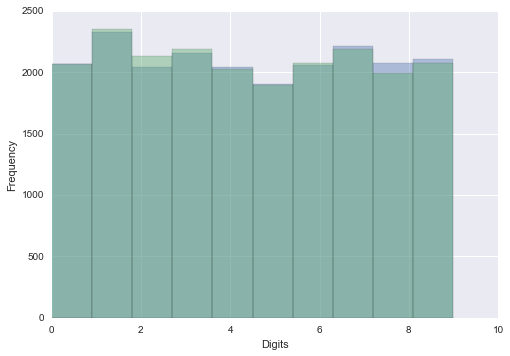

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels
y = train.label.values
X = train.values / 255.0; 
test_values = test.values /255.0 


# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set


# We will now check the distribution of the split
# https://seaborn.pydata.org/tutorial/distributions.html
%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Plot a distribution histogram of training and testing sets
for p in [y_train, y_test]: 
    ax = sns.distplot(p, bins=10, hist=True, kde=False)
      
ax.set(xlabel='Digits', ylabel='Frequency')
plt.show()

## The Plot above shows differences in frequencies of the split in colored sections above the solid green bars.  The distribution appears normal, and ready for testing.

### Not Much difference is noticed in the frequencies so it is assumed valid.

In [3]:
# # try piping pca to logistic regression

# from sklearn import linear_model, decomposition
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from datetime import datetime as dt; start = dt.now()  # start a timer

# print("Fitting...")
# logistic = linear_model.LogisticRegression()

# pca = decomposition.PCA()
# model = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# piped = model.fit(X_train, y_train)
# print 'CPU Time: ', dt.now() - start; 

# plt.figure(1, figsize=(16, 12))
# plt.clf()
# plt.axes([.2, .2, .7, .7])
# plt.plot(pca.explained_variance_, linewidth=2)
# plt.axis('tight')
# plt.xlabel('n_components')
# plt.ylabel('explained_variance_')

# plt.show()

In [9]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

from sklearn.decomposition import PCA
n_comp = 50

# whitening was recommended
pca = PCA(n_components=n_comp, whiten=True)

# Set fitted PCA object
X = pca.fit_transform(X_train)
y = pca.fit_transform(X_test)

evr = pd.Series(pca.explained_variance_ratio_)
print 'Train Pct Variance Explained: '
for i in range(50/5):
    print 'PC-' + str(i) + ':', (evr[i]*100).round(decimals=4)  
print '.'*60
print 'PC-' + str(50) + ':', (evr[49]*100).round(decimals=4), '\n';


Train Pct Variance Explained: 
PC-0: 9.7399
PC-1: 7.1819
PC-2: 6.1423
PC-3: 5.3788
PC-4: 4.9052
PC-5: 4.3112
PC-6: 3.263
PC-7: 2.8829
PC-8: 2.7871
PC-9: 2.3614
............................................................
PC-50: 0.3263 



In [6]:
import numpy as np


# setting labels as integers
labels = X_train[:,:1]


# Set samples equal to n_rows and features equal to n_columns
n_samples, n_features = X.shape

# Set height and width of the frame
_, h, w = (X.shape[0], int(np.sqrt(n_features)), int(np.sqrt(n_features)))

# Number of classes are equal to the number of unique labels
n_classes = len(train['label'].unique())

Xp = X
yp = y_train
names = train['label'].unique()
import pylab as pl
import numpy as np

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i], cmap=pl.cm.gray)
        pl.title(titles[i], size=16)
        pl.xticks(())
        pl.yticks(())

eigendigits = pca.components_
eigendigit_titles = ["eigendigit %d" % i for i in range(eigendigits.shape[0])]

#plot_gallery(eigendigits, eigendigit_titles, h, w)

NameError: name 'X_train' is not defined

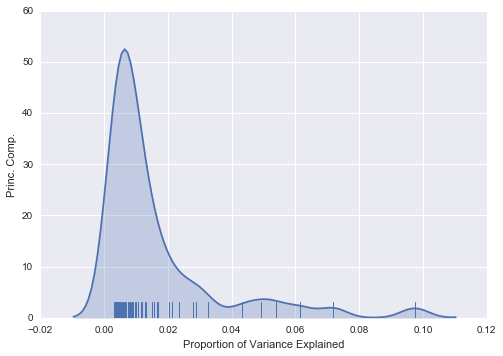

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

d = pd.Series(pca.explained_variance_ratio_)
ax = sns.kdeplot(d, shade=True)
ax = sns.rugplot(d);

ax.set(xlabel='Proportion of Variance Explained', ylabel='Princ. Comp.')
plt.show()


## Above is the kernel density estimate with rug plot showing the percent variance explained by each of the 50 principal components.  Most of the variance is explained by the first 10 PCs

## We will now try to run PCA un the full training and testing sets

In [1]:
# The function below plots a confusion matrix
#
from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# # Create a DF from corr    
# conf = pd.DataFrame(conf)
# corr = conf.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
# #         linecolor='white', 
# #         cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

# ax = sns.heatmap(corr)

Automatically created module for IPython interactive environment


ImportError: No module named model_selection

In [6]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

# l2 regulariazation only works with 'multinomial' and solvers: ‘newton-cg’, ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=10, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.0001, max_iter=15, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial').fit(X, y_test)

# print 'maximum probability', [x for max(x) in prob]
print("Sag Solver...")
print("Fitting Logit...")
c.fit(X, y_train)

print("predicting...")
y_hat = c.predict(y) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)

print 'CPU Time: ', dt.now() - start; 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

prob = c.predict_proba(y)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)


NameError: name 'sns' is not defined

# The plot above shows high confusion with the 6's and 0's respecitively.  Also, 7 and 1 have been highly confused.  

lbfgs Solver...
Fitting Logit...
predicting...
Accuracy 0.357285714286
CPU Time:  0:01:43.694000
Confusion matrix, without normalization
[[1678    0   61   23    5  192   22   52    7   24]
 [   0  320    1    4   66   12   11 1203   24  714]
 [  47    5 1127   39  342   21  115  183   95  158]
 [  16    0   24  432  217   74   45  493  106  784]
 [  18  117  744  412  184  131  104    4  284   28]
 [  79   43   31   44   68  848  115  171  294  201]
 [  62    0  112    5   44   69 1758   14    6    7]
 [  13  246  296 1210    7   83    1  113  171   51]
 [  13    9   81   38  139   75   72   91  973  500]
 [  13  198  421  847   48   87   16   52  327   70]]
Probabilities [[  9.62e-05   2.96e-06   7.08e-03 ...,   1.04e-01   3.11e-02   1.04e-02]
 [  4.91e-09   1.85e-05   7.42e-01 ...,   2.60e-09   7.67e-04   5.89e-08]
 [  7.84e-09   2.85e-04   6.54e-03 ...,   4.55e-10   2.79e-02   2.27e-08]
 ..., 
 [  1.27e-03   1.34e-07   1.96e-04 ...,   2.01e-07   7.38e-01   6.76e-03]
 [  2.56e-06   

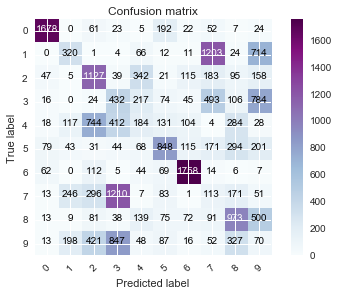

In [31]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

c = LogisticRegressionCV(solver='lbfgs', cv=10, penalty='l2',random_state=25,
        multi_class='multinomial').fit(X[:], y_test)


print("lbfgs Solver...")
print("Fitting Logit...")
c.fit(X, y_train)

print("predicting...")
y_hat = c.predict(y) 


print 'Accuracy', mt.accuracy_score(y_test,y_hat)

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

prob = c.predict_proba(y)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)

## 'sag' solver and multinomial class wins at < 50 seconds with 37.00% accuracy and 10 fold cross validation.  The confusion Matrices show 

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use of tools for this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

Below a pipeline is used to help to a greater extent which values are the largest determinents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and playing with the parameters.

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels
y = train.label.values
X = train.iloc[:,1:].values / 255.0; 
test_values = test.values /255.0 


# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set

print "Done Splitting."


Done Splitting.


In [33]:
from sklearn.decomposition import PCA
n_comp = 50

# whitening was recommended
pca = PCA(n_components=n_comp, whiten=True)

# Set fitted PCA object
X = pca.fit_transform(X_train)
y = pca.fit_transform(X_test)



# Try a 3rd Degree polynomial

Training SVM... Predicting...
Accuracy 0.401428571429
CPU Time:  0:01:59.704000
Probabilities [[  9.92e-05   2.97e-06   7.29e-03 ...,   1.09e-01   3.07e-02   1.11e-02]
 [  4.58e-09   1.77e-05   7.33e-01 ...,   2.61e-09   7.70e-04   5.73e-08]
 [  7.21e-09   2.67e-04   6.29e-03 ...,   4.22e-10   2.73e-02   2.11e-08]
 ..., 
 [  1.29e-03   1.36e-07   1.94e-04 ...,   2.01e-07   7.39e-01   6.70e-03]
 [  2.55e-06   2.95e-13   1.17e-04 ...,   3.42e-15   9.92e-01   2.41e-08]
 [  3.69e-05   2.65e-05   4.92e-03 ...,   1.64e-04   3.10e-03   1.78e-03]]
Confusion matrix, without normalization
[[1126    6   37   51   31  410   34  116   12  241]
 [   0 1058    0   17  294    3    1   20   11  951]
 [  14   26  993   40  330   14   29  169  168  349]
 [   0    5   11  792  166   84    9  324  114  686]
 [   6   40  162  588  360  162    6    4  478  220]
 [  26   35    6  105  131  944   20  104  238  285]
 [  13    3  104   15  101  120 1480    9  123  109]
 [   0  153   94 1071    6   49    1  310  

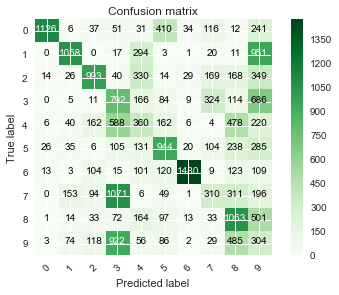

In [34]:
%matplotlib inline

# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, probability=True)
print("Training SVM..."), 
s.fit(X, y_train) 

print("Predicting...") 
y_hat = s.predict(y) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(y)
print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


# The CM above shows confusion with 7--3, 3--9, 1--9 and particular trouble with 6;  it is possibly overfitting, C and tol could be turned down.  Edge detection is going to be key for classification

Training SVM... Predicting...
Accuracy 0.351238095238
CPU Time:  0:00:37.723000
Probabilities [[  9.92e-05   2.97e-06   7.29e-03 ...,   1.09e-01   3.07e-02   1.11e-02]
 [  4.58e-09   1.77e-05   7.33e-01 ...,   2.61e-09   7.70e-04   5.73e-08]
 [  7.21e-09   2.67e-04   6.29e-03 ...,   4.22e-10   2.73e-02   2.11e-08]
 ..., 
 [  1.29e-03   1.36e-07   1.94e-04 ...,   2.01e-07   7.39e-01   6.70e-03]
 [  2.55e-06   2.95e-13   1.17e-04 ...,   3.42e-15   9.92e-01   2.41e-08]
 [  3.69e-05   2.65e-05   4.92e-03 ...,   1.64e-04   3.10e-03   1.78e-03]]
Confusion matrix, without normalization
[[1669    0  121   42    4  133   16   54    4   21]
 [   0  120    6   14  456    2   13  585   21 1138]
 [  68    5 1215   36  378   18  171  107   39   95]
 [  34    1   40  578  192   77   49  434  111  675]
 [  21  146  639  456  142  282   65    5  256   14]
 [ 119   17   25  107   62  825  130  157  276  176]
 [  93    0  134    1  111   71 1644   13    8    2]
 [  20  381  320 1048    8  109    4  187  

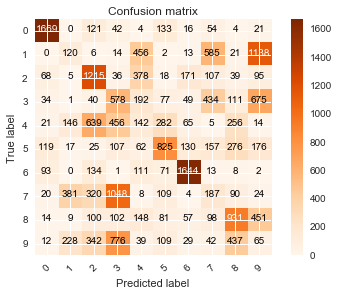

In [35]:
# Linear Kernel with tolerance upped by order of magnitude
start = dt.now()
s = SVC(C=0.3, kernel='linear', probability=True, tol=0.0001)
print("Training SVM..."), 
s.fit(X, y_train) 

print("Predicting...") 
y_hat = s.predict(y) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(y)
print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


## simillar issues 7--3, 3--9, 9--1 are having trouble, but more sparse than polynomial.  Less fitting and sensitivity as tol and C went down.  

Training SVM... Predicting...
Accuracy 0.449952380952
CPU Time:  0:01:39.342000
Probabilities [[  9.92e-05   2.97e-06   7.29e-03 ...,   1.09e-01   3.07e-02   1.11e-02]
 [  4.58e-09   1.77e-05   7.33e-01 ...,   2.61e-09   7.70e-04   5.73e-08]
 [  7.21e-09   2.67e-04   6.29e-03 ...,   4.22e-10   2.73e-02   2.11e-08]
 ..., 
 [  1.29e-03   1.36e-07   1.94e-04 ...,   2.01e-07   7.39e-01   6.70e-03]
 [  2.55e-06   2.95e-13   1.17e-04 ...,   3.42e-15   9.92e-01   2.41e-08]
 [  3.69e-05   2.65e-05   4.92e-03 ...,   1.64e-04   3.10e-03   1.78e-03]]
Confusion matrix, without normalization
[[1621    0   72   37   11  256   19   13    8   27]
 [   0  944    4   36  457    4    7  278   13  612]
 [  25    3 1456   18  209   15  100   89  131   86]
 [  26    1   63  795  216  117   24  342  126  481]
 [   7   26  533  492  262  189   27    1  455   34]
 [  76    2   35  113   55 1081   67   77  291   97]
 [  45    0  100    5   34   76 1781   12   21    3]
 [  21  131  394 1173   10   41    0  185  

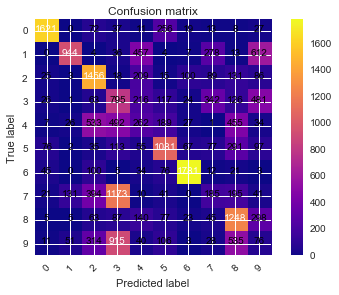

In [38]:
# rbf kernel 
start = dt.now()
s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(X, y_train) 

print("Predicting...") 
y_hat = s.predict(y) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(y)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.plasma)



# Not much difference with normalization, but as you can see, SVM outperforms the logit in this arena due to multidimensionality and flexibility.

# With some modifications, SVM can be greatly improved

## Future Work, we will continue using PCA with Neural Networks and Random Forest Classifiers in Lab 2

In [4]:
import numpy as np
from sklearn.svm import SVR
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(8))

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 2


In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='r', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='Radial Basis Function Model')
plt.plot(X, y_lin, color='red', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='purple', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()